In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"

In [3]:
data_house = pd.read_csv(url)

In [4]:
data_house.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
data_house.shape

(645, 8)

In [6]:
data_house.describe()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,325.159690,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,187.312152,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,1.000000,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,164.000000,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,326.000000,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,487.000000,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,648.000000,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [7]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [8]:
data_house.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [9]:
data_house.drop(['Unnamed: 0'],axis=1, inplace=True)

In [10]:
data_house.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


<AxesSubplot:>

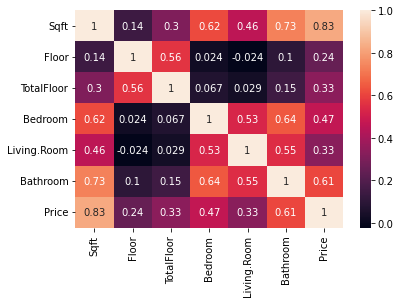

In [11]:
sns.heatmap(data_house.corr(),annot=True)

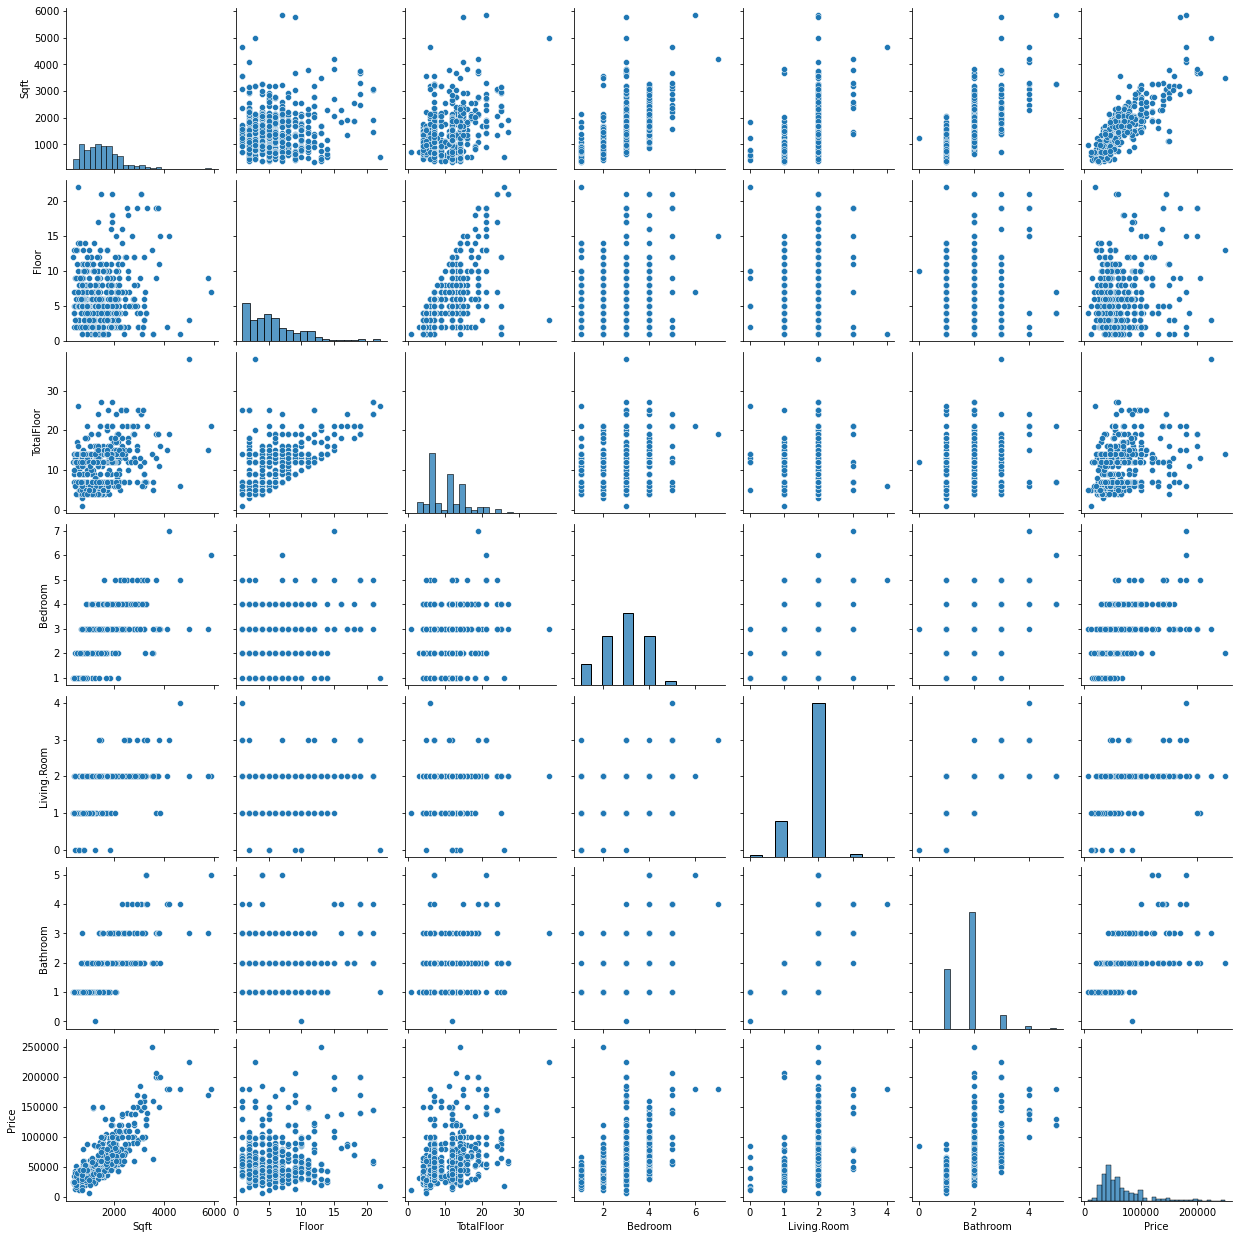

In [12]:
sns.pairplot(data_house)

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

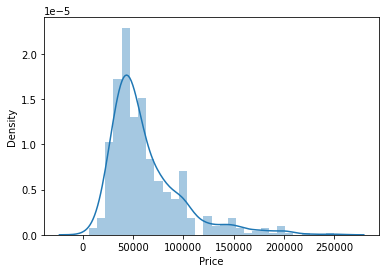

In [13]:
sns.distplot(data_house['Price'])

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bedroom', ylabel='count'>

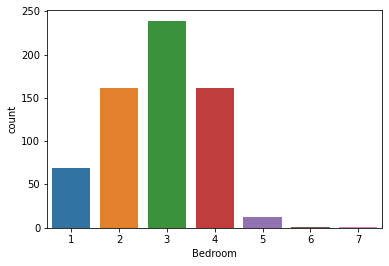

In [14]:
sns.countplot(data_house['Bedroom'])

C:\Users\mdfai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sqft', ylabel='Density'>

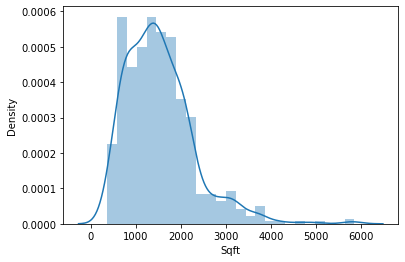

In [15]:
sns.distplot(data_house['Sqft'])

In [16]:
x = data_house.iloc[:,:-1]
y = data_house.iloc[:,1]

In [17]:
ss = StandardScaler()

In [18]:
ss.fit_transform(x)

array([[-0.45639303, -1.01489712, -0.77234699, -0.82895634,  0.40269363,
         0.27691822],
       [ 0.79179777, -0.24204158, -0.77234699,  1.15132825,  0.40269363,
         0.27691822],
       [-0.50743429, -0.24204158, -0.77234699, -0.82895634,  0.40269363,
        -1.18711665],
       ...,
       [-1.02712711,  1.81890652,  0.62980285, -1.81909863, -1.76178464,
        -1.18711665],
       [ 0.23498403, -0.7572786 ,  0.62980285,  0.16118595,  0.40269363,
         0.27691822],
       [-0.19654662,  0.01557693, -0.77234699,  0.16118595,  0.40269363,
        -1.18711665]])

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [25]:
mean_squared_error(y_pred,y_test)

1.6166986043445954e-26

In [29]:
mean_absolute_error(y_pred,y_test)

9.997043284830895e-14